In [4]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [5]:
def readCSVFile(filePath):
    file = open(filePath)
    CSVReader = csv.reader(file)
    next(CSVReader)
    rows = []
    for row in CSVReader:
        rows.append(row)
        row.pop(0)
    return rows

rows = readCSVFile("lab_1_train.csv")
xColumn = [float(row[0]) for row in rows]
yColumn = [float(row[1]) for row in rows]

In [6]:
rows

[['0.0', '20.14901424590337'],
 ['0.010101010101010102', '19.978722729850666'],
 ['0.020202020202020204', '20.234710601834248'],
 ['0.030303030303030304', '20.51751501752847'],
 ['0.04040404040404041', '20.010562068391078'],
 ['0.05050505050505051', '20.030769013925347'],
 ['0.06060606060606061', '20.59497596586434'],
 ['0.07070707070707072', '20.371644560160014'],
 ['0.08080808080808081', '20.020773845835677'],
 ['0.09090909090909091', '20.344586194893974'],
 ['0.10101010101010102', '20.062994894176462'],
 ['0.11111111111111112', '20.082503296151145'],
 ['0.12121212121212122', '20.315012923894052'],
 ['0.13131313131313133', '19.688642189228922'],
 ['0.14141414141414144', '19.765352933074375'],
 ['0.15151515151515152', '20.13434404425801'],
 ['0.16161616161616163', '20.019382987131994'],
 ['0.17171717171717174', '20.437708543212924'],
 ['0.18181818181818182', '20.09122914098'],
 ['0.19191919191919193', '19.960147273437798'],
 ['0.20202020202020204', '20.84373503471687'],
 ['0.212121212

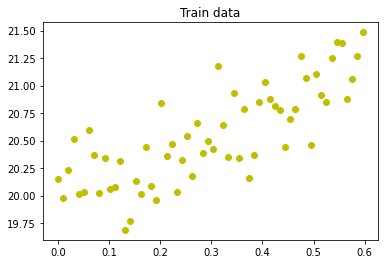

In [7]:
plt.title("Train data")
plt.plot(xColumn, yColumn, 'yo')

In [12]:
tolerance = 0.000001
learningRate = 0.01


def linearRegressionFunction(beta0, beta1, x):
    return beta0 + np.multiply(beta1, x)


def lossFunction(predictedRow, actualRow):
    result = 0
    for i in range(0, len(predictedRow)):
        result += (predictedRow[i] - actualRow[i]) ** 2
    return result / len(predictedRow)


def train(rows):
    beta0 = float(np.random.randn(1))
    beta1 = float(np.random.randn(1))

    xColumn = []
    yColumn = []
    for row in rows:
        xColumn.append(float(row[0]))
        yColumn.append(float(row[1]))
    predictedY = []
    for x in xColumn:
        predictedY.append(linearRegressionFunction(beta0, beta1, x))
    loss = lossFunction(predictedY, yColumn)
    delta = 100
    epochNumber = 0
    while tolerance < delta:
        predictedY = []
        for x in xColumn:
            predictedY.append(linearRegressionFunction(beta0, beta1, x))
        differenceYValues = [(expected - predicted) for (expected, predicted) in zip(yColumn, predictedY)]
        derivativeBeta0 = - (2 / len(differenceYValues)) * np.sum(differenceYValues)
        sum = 0
        for (xValue, yDiff) in zip(xColumn, differenceYValues):
            sum += xValue * yDiff
        derivativeBeta1 = - (2 / len(differenceYValues)) * sum

        beta0 = beta0 - learningRate * derivativeBeta0
        beta1 = beta1 - learningRate * derivativeBeta1
        predictedY = []
        for x in xColumn:
            predictedY.append(linearRegressionFunction(beta0, beta1, x))
        currentLoss = lossFunction(predictedY, yColumn)
        delta = loss - currentLoss
        loss = currentLoss
        print("Epoch %s: beta0 = %s; beta1 = %s; Loss function value = %s;" % (epochNumber, beta0, beta1, currentLoss))
        epochNumber += 1

    return {
        "beta0" : beta0,
        "beta1" : beta1
    }

betaObject = train(rows)
betaObject

Epoch 0: beta0 = 0.9740565870170563; beta1 = -1.429257034983653; Loss function value = 400.4843086257523;
Epoch 1: beta0 = 1.3740845135483968; beta1 = -1.3079710303615248; Loss function value = 383.20173821748625;
Epoch 2: beta0 = 1.765389065966009; beta1 = -1.1893586435318193; Loss function value = 366.6653826976634;
Epoch 3: beta0 = 2.1481606454339603; beta1 = -1.073361502506945; Loss function value = 350.8430222193699;
Epoch 4: beta0 = 2.5225854972195765; beta1 = -0.9599225093969612; Loss function value = 335.70382811509506;
Epoch 5: beta0 = 2.8888458014044813; beta1 = -0.8489858125997566; Loss function value = 321.2183028287805;
Epoch 6: beta0 = 3.2471197616156844; beta1 = -0.7404967795982345; Loss function value = 307.35822244146794;
Epoch 7: beta0 = 3.597581691819927; beta1 = -0.634401970351256; Loss function value = 294.0965816785589;
Epoch 8: beta0 = 3.9404021012235626; beta1 = -0.5306491112653808; Loss function value = 281.40754129153134;
Epoch 9: beta0 = 4.275747777319321; be

{'beta0': 19.90769641853024, 'beta1': 2.149146770958596}

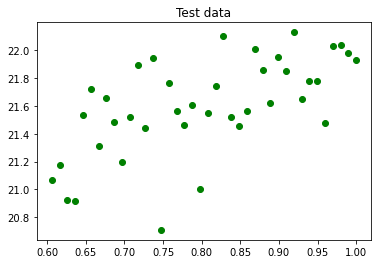

In [13]:
testRows = readCSVFile("lab_1_test.csv")
testXColumn = [float(row[0]) for row in testRows]
testYColumn = [float(row[1]) for row in testRows]
plt.title("Test data")
plt.plot(testXColumn, testYColumn, 'go')

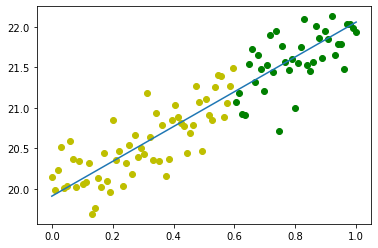

In [14]:
plt.plot(xColumn, yColumn, 'yo',
         testXColumn, testYColumn, 'go',
         [0, 1], [linearRegressionFunction(betaObject["beta0"], betaObject["beta1"], 0), linearRegressionFunction(betaObject["beta0"], betaObject["beta1"], 1)])

In [15]:
predictedY = []
for x in testXColumn:
    predictedY.append(linearRegressionFunction(betaObject["beta0"], betaObject["beta1"], x))

loss = lossFunction(predictedY, testYColumn)
loss

0.07538444990416034